# Typical SVM


Load data

In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target

Preprocess

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# split data set
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y,test_size=0.3,
                                          random_state=1, stratify=y)

# Scaler
scaler = StandardScaler()

scaler.fit(X_tr)

# standardize features
X_st_tr = scaler.transform(X_tr)
X_st_ts = scaler.transform(X_ts)

# combine for plotting
X_comb_std = np.vstack((X_st_tr, X_st_ts))
y_comb_std = np.hstack((y_tr, y_ts))

In [5]:
from plot_decision import plot_decision_regions

X_comb_std = np.vstack((X_st_tr, X_st_ts))
y_comb_std = np.hstack((y_tr, y_ts))


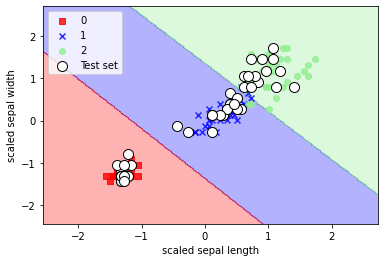

In [23]:
from sklearn.svm import SVC
from matplotlib import pyplot as plt

# create svm classifier
svm = SVC(kernel ='linear', C=1, random_state=1)

# train svm
svm.fit(X_st_tr, y_tr)

# plot decision regions

plot_decision_regions(X=X_comb_std, y=y_comb_std,
                      classifier=svm, test_idx=range(105,150))
plt.ylabel('scaled sepal width')
plt.xlabel('scaled sepal length')
plt.legend()
plt.show()

# Nonlinear SVM

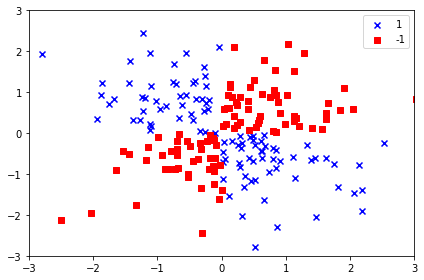

In [25]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
X_xor = np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[:,0]>0,
                      X_xor[:,1]>0)
y_xor = np.where(y_xor, 1, -1)


plt.scatter(X_xor[y_xor ==1, 0],
           X_xor[y_xor == 1, 1],
           c='b', marker='x', label='1')

plt.scatter(X_xor[y_xor == -1, 0],
           X_xor[y_xor == -1, 1],
           c='r', marker='s', label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend()
plt.tight_layout()
plt.show()


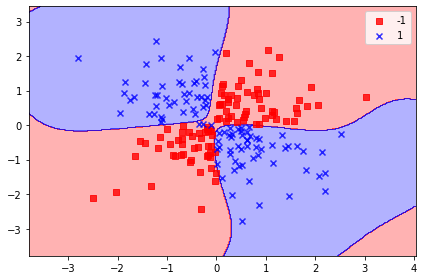

In [33]:
from sklearn.svm import SVC
# train nonlinear SVM with RBF
svmRBF = SVC(kernel='rbf', C=110.0, gamma=0.5, random_state =1)
# train
svmRBF.fit(X_xor, y_xor)
# plot
plot_decision_regions(X_xor, y_xor, classifier=svmRBF)
plt.legend()
plt.tight_layout()
plt.show()